In [3]:
#connect to database

import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




connection = pymysql.connect(
    # host='192.168.208.1',
    host='192.168.11.6',
    user='root', 
    password='water',
    database='waterdata',
    port=30000)


dt = 0.01

try:
    with connection.cursor() as cursor:
               
        sql1 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                        `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                        `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                        `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                        
                    FROM   
                        `groundwater` AS `A`  
                    INNER JOIN
                        `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `rainfall` `D` ON (`D`.`meter_no` = "54151" AND `D`.`read_date` = `A`.`read_date` )    
                    
                    WHERE  
                        `A`.`meter_no` = "GW967137.1.1"
                    ''')
        
        
        sql2 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                        `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                        `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                        `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                        
                    FROM   
                        `groundwater` AS `A`  
                    INNER JOIN
                        `groundwater` `B` ON (`B`.`meter_no` = "GW967138.2.2" AND `B`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `rainfall` `D` ON (`D`.`meter_no` = "54151" AND `D`.`read_date` = `A`.`read_date` )    
                    
                    WHERE  
                        `A`.`meter_no` = "GW967138.1.1" AND `B`.`bl_ahd` > 0
                    ''')
        
        
        
        sql3 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                        `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                        `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                        `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                    FROM   
                        `groundwater` AS `A`  
                    INNER JOIN
                        `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `rainfall` `D` ON (`D`.`meter_no` = "54151" AND `D`.`read_date` = `A`.`read_date` )
                    WHERE  
                        `A`.`meter_no` = "GW967137.1.1"
                    ''')
        
   
    
    df1_orig = pd.read_sql_query(sql1, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)  ## , index_col="A.read_date"
    df2_orig = pd.read_sql_query(sql2, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
    
    

     
  
except:
    print("Error: unable to convert the data")
connection.close()


In [5]:
#filter out incomplete rows from the groundwater series start date
        
df1 = df1_orig[df1_orig['read_date'] >= '2005-11-17']                              # Elfin Crossing Data
df2 = df2_orig[df2_orig['read_date'] >= '2007-09-06']                              # Green Gully Data

#calculate the bore level change for 1 day, 1 week and 1 month

# setup date deltas

day_0 = (df1['read_date'])

day_1 = (day_0) - pd.DateOffset(days=1)
day_7 = (day_0) - pd.DateOffset(days=7)
day_14 = (day_0) - pd.DateOffset(days=14)
day_30 = (day_0) - pd.DateOffset(days=30)


#Elfin

# correct data types

df1['bl_ahd1'] = pd.to_numeric(df1['bl_ahd1'] )
df1['bl_ahd2'] = pd.to_numeric(df1['bl_ahd2'])
df1['sl_read1'] = pd.to_numeric(df1['sl_read1'])

#calculate change in bore levels for each date delta

# GW967137.1.1
                                
E_bl_ahd1_dt1 = df1['bl_ahd1'].shift(-1) - df1['bl_ahd1']
E_bl_ahd1_dt7 = df1['bl_ahd1'].shift(-7) - df1['bl_ahd1']
E_bl_ahd1_dt14 = df1['bl_ahd1'].shift(-14) - df1['bl_ahd1']
E_bl_ahd1_dt30 = df1['bl_ahd1'].shift(-30) - df1['bl_ahd1']


# GW967137.2.2

E_bl_ahd2_dt1 = df1['bl_ahd2'].shift(-1) - df1['bl_ahd2']
E_bl_ahd2_dt7 = df1['bl_ahd2'].shift(-7) - df1['bl_ahd2']
E_bl_ahd2_dt14 = df1['bl_ahd2'].shift(-14) - df1['bl_ahd2']
E_bl_ahd2_dt30 = df1['bl_ahd2'].shift(-30) - df1['bl_ahd2']


# 419051 - surface water

E_sl_read1_dt1 = df1['sl_read1'].shift(-1) - df1['sl_read1']
E_sl_read1_dt7 = df1['sl_read1'].shift(-7) - df1['sl_read1']
E_sl_read1_dt14 = df1['sl_read1'].shift(-14) - df1['sl_read1']
E_sl_read1_dt30 = df1['sl_read1'].shift(-30) - df1['sl_read1']

#insert deltas into data frames


df1.insert(7, 'bl_ahd1_dt1', E_bl_ahd1_dt1)
df1.insert(8, 'bl_ahd2_dt1', E_bl_ahd2_dt1)
df1.insert(9, 'sl_read1_dt1', E_sl_read1_dt1)
df1.insert(10, 'bl_ahd1_dt7', E_bl_ahd1_dt7)
df1.insert(11, 'bl_ahd2_dt7', E_bl_ahd2_dt7)
df1.insert(12, 'sl_read1_dt7', E_sl_read1_dt7)
df1.insert(13, 'bl_ahd1_dt14', E_bl_ahd1_dt14)
df1.insert(14, 'bl_ahd2_dt14', E_bl_ahd2_dt14)
df1.insert(15, 'sl_read1_dt14', E_sl_read1_dt14)
df1.insert(16, 'bl_ahd1_dt30', E_bl_ahd1_dt30)
df1.insert(17, 'bl_ahd2_dt30', E_bl_ahd2_dt30)
df1.insert(18, 'sl_read1_dt30', E_sl_read1_dt30)




#Green Gully

# correct data types

df2['bl_ahd1'] = pd.to_numeric(df2['bl_ahd1'] )
df2['bl_ahd2'] = pd.to_numeric(df2['bl_ahd2'])


#calculate change in bore levels for each date delta

# GW967138.1.1

GG_bl_ahd1_dt1 = df2['bl_ahd1'].shift(-1) - df2['bl_ahd1']
GG_bl_ahd1_dt7 = df2['bl_ahd1'].shift(-7) - df2['bl_ahd1']
GG_bl_ahd1_dt14 = df2['bl_ahd1'].shift(-14) - df2['bl_ahd1']
GG_bl_ahd1_dt30 = df2['bl_ahd1'].shift(-30) - df2['bl_ahd1']

# GW967138.2.2

GG_bl_ahd2_dt1 = df2['bl_ahd2'].shift(-1) - df2['bl_ahd2']
GG_bl_ahd2_dt7 = df2['bl_ahd2'].shift(-7) - df2['bl_ahd2']
GG_bl_ahd2_dt14 = df2['bl_ahd2'].shift(-14) - df2['bl_ahd2']
GG_bl_ahd2_dt30 = df2['bl_ahd2'].shift(-30) - df2['bl_ahd2']


# 419051 - surface water

GG_sl_read1_dt1 = df2['sl_read1'].shift(-1) - df2['sl_read1']
GG_sl_read1_dt7 = df2['sl_read1'].shift(-7) - df2['sl_read1']
GG_sl_read1_dt14 = df2['sl_read1'].shift(-14) - df2['sl_read1']
GG_sl_read1_dt30 = df2['sl_read1'].shift(-30) - df2['sl_read1']

#insert deltas into data frames


df2.insert(7, 'bl_ahd1_dt1', GG_bl_ahd1_dt1)
df2.insert(8, 'bl_ahd2_dt1', GG_bl_ahd2_dt1)
df2.insert(9, 'sl_read1_dt1', GG_sl_read1_dt1)
df2.insert(10, 'bl_ahd1_dt7', GG_bl_ahd1_dt7)
df2.insert(11, 'bl_ahd2_dt7', GG_bl_ahd2_dt7)
df2.insert(12, 'sl_read1_dt7', GG_sl_read1_dt7)
df2.insert(13, 'bl_ahd1_dt14', GG_bl_ahd1_dt14)
df2.insert(14, 'bl_ahd2_dt14', GG_bl_ahd2_dt14)
df2.insert(15, 'sl_read1_dt14', GG_sl_read1_dt14)
df2.insert(16, 'bl_ahd1_dt30', GG_bl_ahd1_dt30)
df2.insert(17, 'bl_ahd2_dt30', GG_bl_ahd2_dt30)
df2.insert(18, 'sl_read1_dt30', GG_sl_read1_dt30)




t1  = df1['read_date']

a1 = df1['bl_ahd1']
a2 = df1['bl_ahd2']
a3 = df2['bl_ahd1']
a4 = df2['bl_ahd2']
s1 = df1['bl_ahd1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s2 = df1['bl_ahd2_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s3 = df1['sl_read1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)

t2  = df2['read_date']
          
s4 = df2['bl_ahd1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s5 = df2['bl_ahd2_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s6 = df2['sl_read1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)

#df1.head()

df1.describe()



,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30,rf_read1
count,5692.000000,5692.000000,5692.000000,5691.000000,5691.000000,5691.000000,5685.000000,5685.000000,5685.000000,5678.000000,5678.000000,5678.000000,5662.000000,5662.000000,5662.000000,5692.000000
mean,252.800779,251.360647,0.203393,-0.000038,-0.000025,-0.000003,-0.000281,-0.000204,-0.000019,-0.000547,-0.000436,0.000052,-0.001382,-0.001143,-0.000194,2.793939
std,0.514381,0.491618,0.142174,0.037494,0.013187,0.070873,0.113811,0.035792,0.137538,0.146896,0.046370,0.145914,0.198574,0.067953,0.159306,8.937527
min,251.081000,249.964000,0.000000,-0.349000,-0.172000,-1.344000,-1.334000,-0.463000,-2.568000,-1.786000,-0.528000,-2.845000,-2.148000,-0.479000,-3.104000,0.000000
25%,252.519000,251.056750,0.177000,-0.004000,-0.005000,-0.001000,-0.022000,-0.018000,-0.002000,-0.041000,-0.026000,-0.003000,-0.078000,-0.045000,-0.005000,0.000000
50%,252.984000,251.429000,0.190000,-0.002000,-0.001000,0.000000,-0.008000,-0.004000,0.000000,-0.012000,-0.006000,0.000000,-0.020000,-0.009000,0.000000,0.000000
75%,253.122250,251.676000,0.206000,0.001000,0.004000,0.000000,0.004000,0.011000,0.001000,0.009000,0.017000,0.001000,0.022000,0.027000,0.002000,0.200000
max,255.702000,252.584000,3.413000,1.976000,0.514000,2.068000,2.394000,0.731000,3.099000,2.355000,0.743000,3.083000,2.200000,0.777000,2.999000,149.000000


In [6]:
df2.describe()

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30,rf_read1
count,5035.000000,5035.000000,5035.000000,5034.000000,5034.000000,5034.000000,5028.000000,5028.000000,5028.000000,5021.000000,5021.000000,5021.000000,5005.000000,5005.000000,5005.000000,5035.000000
mean,281.816981,279.602523,0.204997,0.000387,0.000146,0.000019,0.002740,0.000997,0.000148,0.005578,0.002017,0.000440,0.012335,0.004288,0.000729,2.842085
std,1.471054,1.051536,0.150059,0.114720,0.044976,0.074782,0.349697,0.059194,0.145570,0.477278,0.082052,0.154403,0.649161,0.145885,0.168559,9.163042
min,279.481000,276.879000,0.000000,-0.510000,-2.190000,-1.344000,-1.790000,-2.175000,-2.568000,-2.220000,-2.156000,-2.845000,-2.513000,-2.041000,-3.104000,0.000000
25%,280.540500,278.792500,0.178000,-0.009000,-0.005000,-0.001000,-0.052000,-0.025000,-0.002000,-0.096000,-0.046000,-0.003000,-0.178000,-0.092000,-0.004000,0.000000
50%,281.469000,279.258000,0.191000,-0.005000,-0.001000,0.000000,-0.029000,-0.008000,0.000000,-0.052000,-0.018000,0.000000,-0.095000,-0.043000,0.000000,0.000000
75%,283.028500,280.513000,0.206000,-0.001000,0.004000,0.000000,-0.011000,0.016000,0.001000,-0.022000,0.031000,0.001000,-0.041000,0.060000,0.002000,0.200000
max,286.040000,281.626000,3.413000,3.359000,2.204000,2.068000,4.566000,2.235000,3.099000,4.487000,2.220000,3.083000,4.594000,2.315000,2.999000,149.000000


<AxesSubplot:title={'center':'Green Gully Ground Water Depth over Time'}, xlabel='Date', ylabel='AHD(m)'>

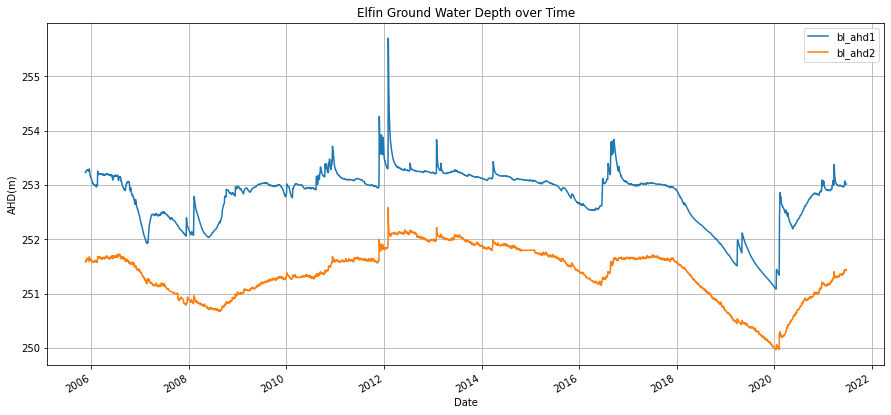

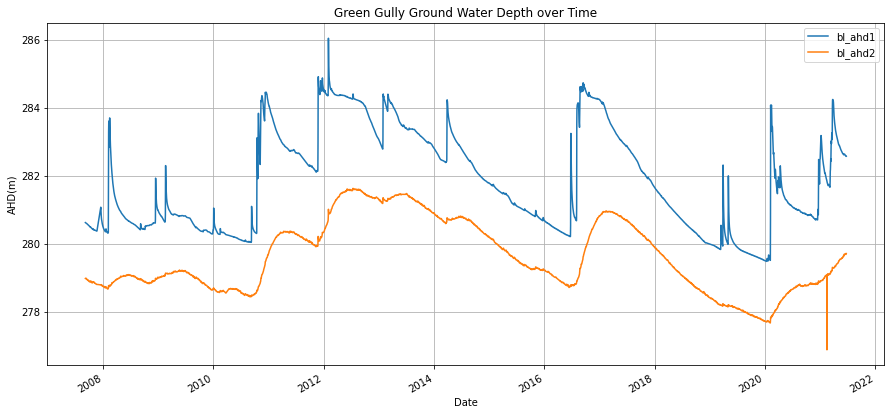

In [7]:
df1.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,7), grid=True, title='Elfin Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)')
df2.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,7), grid=True, title='Green Gully Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)')

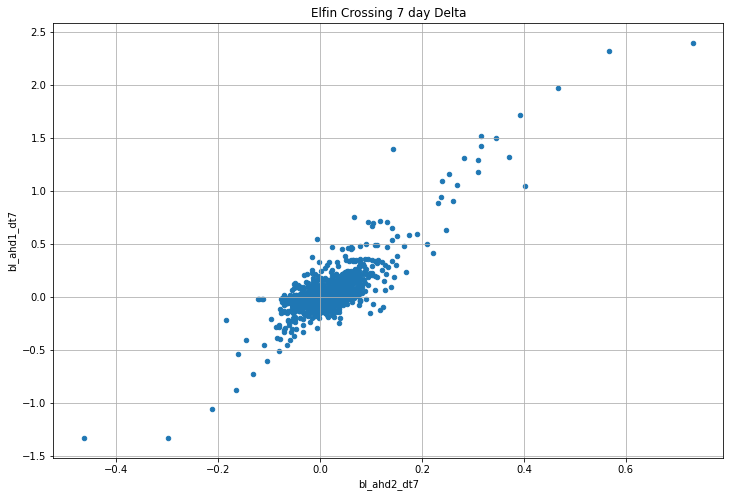

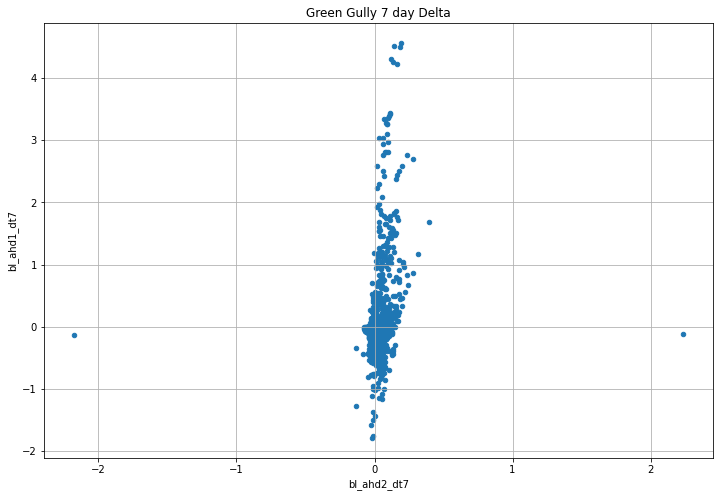

In [8]:
df1.plot.scatter(x='bl_ahd2_dt7', y='bl_ahd1_dt7', figsize=(12, 8), title="Elfin Crossing 7 day Delta", xlabel="GW967137.2.2", ylabel='GW967137.1.1',grid=True)
df2.plot.scatter(x='bl_ahd2_dt7', y='bl_ahd1_dt7', figsize=(12, 8), title="Green Gully 7 day Delta", xlabel='GW967138.2.2', ylabel='GW967138.1.1', grid=True)

plt.show()

In [6]:
df1['bl_ahd2_dt7'].cov(df1['bl_ahd1_dt7'])


0.0031071087452814003

In [7]:
df2['bl_ahd2_dt7'].cov(df2['bl_ahd1_dt7'])

0.0049346687136083535

In [8]:
df1['bl_ahd2_dt7'].corr(df1['bl_ahd1_dt7'])

0.7627652090493868

In [9]:
df2['bl_ahd2_dt7'].corr(df2['bl_ahd1_dt7'])

0.23838955699340264

In [10]:
df1.cov()

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,0.264588,0.215602,0.040878,-0.000715,0.000035,-0.001833,-0.006569,0.000861,-0.007885,-0.010976,0.002582,-0.009520,-0.020172,0.006439,-0.013356
bl_ahd2,0.215602,0.241688,0.022054,-0.000404,-0.000091,-0.000339,-0.004077,-0.000671,-0.002719,-0.007767,-0.001145,-0.003772,-0.015718,-0.002479,-0.006047
sl_read1,0.040878,0.022054,0.020214,-0.000173,-0.000174,-0.002512,-0.003896,-0.000523,-0.009460,-0.005474,-0.000089,-0.010635,-0.007484,0.001182,-0.012699
bl_ahd1_dt1,-0.000715,-0.000404,-0.000173,0.001406,0.000355,0.002002,0.001489,0.000183,0.000579,0.001259,0.000120,0.000382,0.001315,0.000181,0.000450
bl_ahd2_dt1,0.000035,-0.000091,-0.000174,0.000355,0.000174,0.000512,0.000526,0.000155,0.000396,0.000453,0.000145,0.000311,0.000466,0.000185,0.000343
sl_read1_dt1,-0.001833,-0.000339,-0.002512,0.002002,0.000512,0.005023,0.002258,0.000317,0.002895,0.002004,0.000244,0.002650,0.002001,0.000283,0.002750
bl_ahd1_dt7,-0.006569,-0.004077,-0.003896,0.001489,0.000526,0.002258,0.012953,0.003107,0.011758,0.010788,0.002238,0.005518,0.010540,0.002380,0.005486
bl_ahd2_dt7,0.000861,-0.000671,-0.000523,0.000183,0.000155,0.000317,0.003107,0.001281,0.003227,0.002709,0.001076,0.001561,0.002501,0.001246,0.001486
sl_read1_dt7,-0.007885,-0.002719,-0.009460,0.000579,0.000396,0.002895,0.011758,0.003227,0.018917,0.009444,0.002270,0.010637,0.008702,0.002154,0.010353
bl_ahd1_dt14,-0.010976,-0.007767,-0.005474,0.001259,0.000453,0.002004,0.010788,0.002709,0.009444,0.021579,0.004947,0.014965,0.018607,0.004164,0.008707


In [11]:
df2.cov()

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,2.163998,1.275689,0.105060,-0.006666,0.002852,-0.004387,-0.061753,0.020345,-0.020136,-0.115114,0.040415,-0.025678,-0.213452,0.079417,-0.042042
bl_ahd2,1.275689,1.105728,0.030293,-0.003389,-0.001049,-0.000456,-0.026229,-0.002017,-0.003792,-0.052243,-0.003922,-0.006308,-0.110992,-0.011976,-0.011481
sl_read1,0.105060,0.030293,0.022518,-0.000201,0.000181,-0.002796,-0.003458,0.001918,-0.010596,-0.005567,0.004436,-0.011905,-0.005496,0.010371,-0.014197
bl_ahd1_dt1,-0.006666,-0.003389,-0.000201,0.013161,0.000404,0.004584,0.014355,0.000357,0.001419,0.013286,0.000428,0.000825,0.012191,0.001177,0.001397
bl_ahd2_dt1,0.002852,-0.001049,0.000181,0.000404,0.002023,0.000271,0.000766,0.001170,0.000248,0.000672,0.001300,0.000156,0.000563,0.001619,0.000153
sl_read1_dt1,-0.004387,-0.000456,-0.002796,0.004584,0.000271,0.005592,0.004683,0.000121,0.003227,0.004615,0.000069,0.002952,0.004369,0.000112,0.003066
bl_ahd1_dt7,-0.061753,-0.026229,-0.003458,0.014355,0.000766,0.004683,0.122288,0.004935,0.023557,0.113897,0.005216,0.009022,0.101820,0.009619,0.011337
bl_ahd2_dt7,0.020345,-0.002017,0.001918,0.000357,0.001170,0.000121,0.004935,0.003504,0.001833,0.004634,0.003367,0.000552,0.004153,0.005549,0.000157
sl_read1_dt7,-0.020136,-0.003792,-0.010596,0.001419,0.000248,0.003227,0.023557,0.001833,0.021191,0.022233,0.001238,0.011910,0.019777,0.001188,0.011600
bl_ahd1_dt14,-0.115114,-0.052243,-0.005567,0.013286,0.000672,0.004615,0.113897,0.004634,0.022233,0.227795,0.009849,0.031260,0.197399,0.016660,0.020270


In [12]:
df1_corr = df1.corr(method='spearman')

In [13]:
df1_corr

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,1.000000,0.867697,0.790395,0.082564,0.027021,-0.178655,0.106305,0.124817,-0.231373,0.076386,0.180119,-0.250132,0.016522,0.234559,-0.306817
bl_ahd2,0.867697,1.000000,0.555078,0.092185,-0.022189,-0.100520,0.090062,-0.018282,-0.202276,0.055505,-0.026375,-0.241339,-0.007541,-0.035798,-0.293331
sl_read1,0.790395,0.555078,1.000000,0.099923,0.064193,-0.216526,0.128822,0.217436,-0.254420,0.120555,0.312942,-0.275835,0.083099,0.410477,-0.348331
bl_ahd1_dt1,0.082564,0.092185,0.099923,1.000000,0.344491,0.359637,0.637070,0.190025,0.244753,0.544968,0.171158,0.202705,0.403743,0.168803,0.153344
bl_ahd2_dt1,0.027021,-0.022189,0.064193,0.344491,1.000000,0.166799,0.225980,0.341156,0.144685,0.180537,0.271054,0.110035,0.130812,0.219937,0.092054
sl_read1_dt1,-0.178655,-0.100520,-0.216526,0.359637,0.166799,1.000000,0.230622,0.041326,0.405082,0.180518,0.013226,0.295536,0.141094,-0.026631,0.239469
bl_ahd1_dt7,0.106305,0.090062,0.128822,0.637070,0.225980,0.230622,1.000000,0.482040,0.503080,0.808486,0.389328,0.385529,0.595565,0.343648,0.277979
bl_ahd2_dt7,0.124817,-0.018282,0.217436,0.190025,0.341156,0.041326,0.482040,1.000000,0.290920,0.401826,0.684849,0.219426,0.302081,0.551282,0.171624
sl_read1_dt7,-0.231373,-0.202276,-0.254420,0.244753,0.144685,0.405082,0.503080,0.290920,1.000000,0.371973,0.207483,0.635989,0.268936,0.108849,0.455379
bl_ahd1_dt14,0.076386,0.055505,0.120555,0.544968,0.180537,0.180518,0.808486,0.401826,0.371973,1.000000,0.540924,0.516727,0.750428,0.437495,0.369007


            Elfin Crossing - Heatmap, GW967137.1.1 v GW967137.2.2            


<AxesSubplot:>

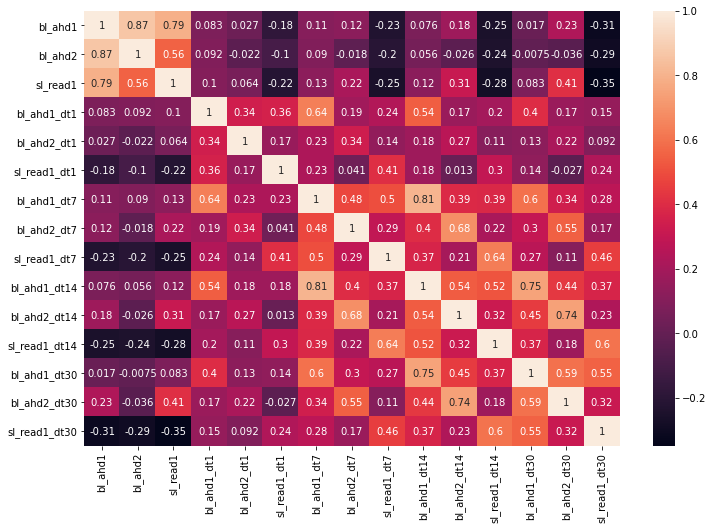

In [14]:
plt.figure(figsize=(12, 8))
print("            Elfin Crossing - Heatmap, GW967137.1.1 v GW967137.2.2            ")
sns.heatmap(df1_corr, annot=True)

In [15]:
df2_corr = df2.corr(method='spearman')

df2_corr

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,1.000000,0.834858,0.708603,-0.275389,0.195234,-0.194709,-0.323660,0.279376,-0.297669,-0.353058,0.283776,-0.342466,-0.383515,0.256657,-0.435006
bl_ahd2,0.834858,1.000000,0.470443,-0.129740,-0.011580,-0.069338,-0.201737,-0.047868,-0.192183,-0.243182,-0.076137,-0.255189,-0.308360,-0.123144,-0.344001
sl_read1,0.708603,0.470443,1.000000,-0.156326,0.253045,-0.236041,-0.146851,0.388852,-0.273994,-0.145290,0.425703,-0.298138,-0.113255,0.432209,-0.375772
bl_ahd1_dt1,-0.275389,-0.129740,-0.156326,1.000000,0.110074,0.221382,0.668233,-0.093819,0.152284,0.554144,-0.144878,0.132065,0.425432,-0.152359,0.146009
bl_ahd2_dt1,0.195234,-0.011580,0.253045,0.110074,1.000000,0.016766,0.063069,0.538586,0.013384,0.041363,0.493172,-0.000521,0.034038,0.459030,-0.017550
sl_read1_dt1,-0.194709,-0.069338,-0.236041,0.221382,0.016766,1.000000,0.139861,-0.113195,0.406371,0.104863,-0.141277,0.300106,0.063509,-0.163186,0.245556
bl_ahd1_dt7,-0.323660,-0.201737,-0.146851,0.668233,0.063069,0.139861,1.000000,0.116662,0.351208,0.838176,0.022757,0.267935,0.655620,-0.011583,0.238493
bl_ahd2_dt7,0.279376,-0.047868,0.388852,-0.093819,0.538586,-0.113195,0.116662,1.000000,0.053402,0.094415,0.846870,0.030757,0.085087,0.775138,-0.000482
sl_read1_dt7,-0.297669,-0.192183,-0.273994,0.152284,0.013384,0.406371,0.351208,0.053402,1.000000,0.301109,-0.023783,0.637146,0.225550,-0.076086,0.460935
bl_ahd1_dt14,-0.353058,-0.243182,-0.145290,0.554144,0.041363,0.104863,0.838176,0.094415,0.301109,1.000000,0.128628,0.398847,0.784060,0.071060,0.289335


            Green Gully - Heatmap, GW967138.1.1 v GW967138.2.2            


<AxesSubplot:>

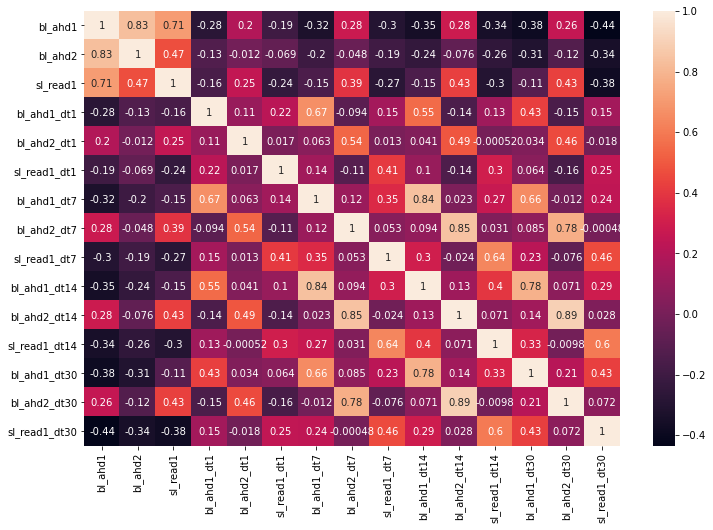

In [16]:
plt.figure(figsize=(12, 8))
print("            Green Gully - Heatmap, GW967138.1.1 v GW967138.2.2            ")
sns.heatmap(df2_corr, annot=True)